# Cal-ITP Style Guide for Charts

In [1]:
import altair as alt
import altair_saver
import pandas as pd

from IPython.display import Markdown

import geography_utils
import calitp_color_palette as cp
import theme_calitp

alt.themes.register("calitp_theme", theme_calitp.calitp_theme)
# enable
alt.themes.enable("calitp_theme")
alt.renderers.enable('altair_saver', fmts=['png'])

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


RendererRegistry.enable('altair_saver')

In [2]:
TABULAR_DATA = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv"
df = pd.read_csv(TABULAR_DATA)

df = geography_utils.aggregate_by_geography(
    df[(df.payment.notna()) & (df.pickup_borough.notna())], 
    group_cols = ["pickup_zone"],
    sum_cols = ["passengers"],
)

df.head()

,pickup_zone,passengers
0,Lenox Hill West,215
1,Upper West Side South,218
2,Alphabet City,11
3,Hudson Sq,74
4,Midtown East,326


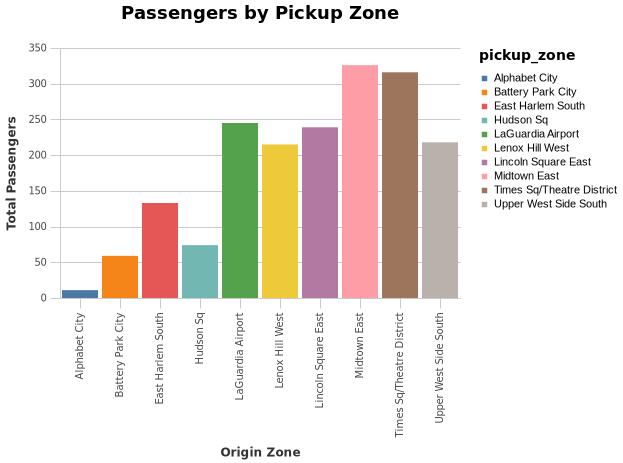

In [3]:
(alt.Chart(df.head(10))
     .mark_bar()
     .encode(
         x=alt.X("pickup_zone:N", title="Origin Zone"),
         y=alt.Y("sum(passengers):Q", title="Total Passengers"),
         color = alt.Color("pickup_zone:N"),
     ).properties(title="Passengers by Pickup Zone")
)

### Bright

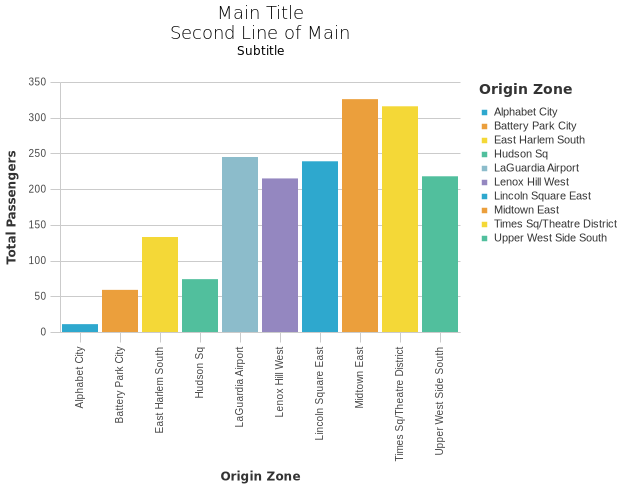

### Bold

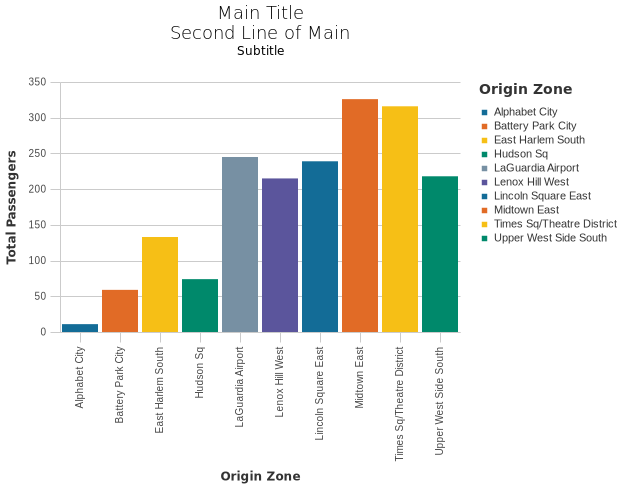

### Diverging

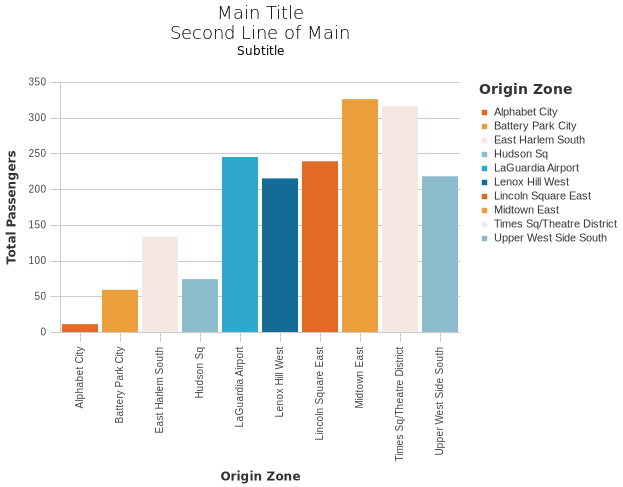

### Sequential

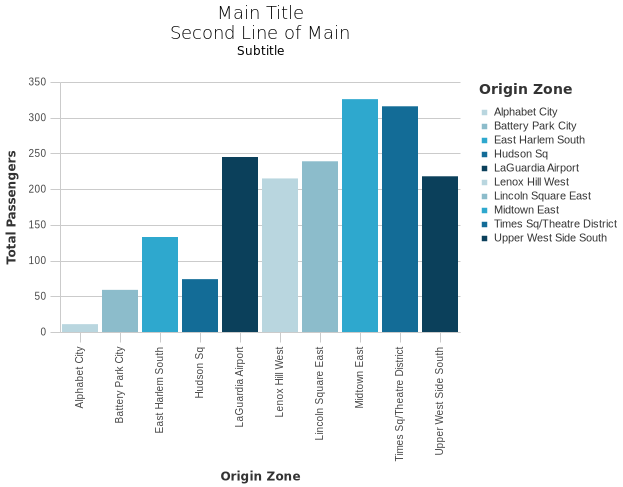

In [5]:
def make_chart(df, colorscale):
    chart = (alt.Chart(df)
             .mark_bar()
             .encode(
                 x=alt.X("pickup_zone:N", title="Origin Zone"),
                 y=alt.Y("sum(passengers):Q", title="Total Passengers"),
                 color = alt.Color("pickup_zone:N", 
                                   scale=alt.Scale(range=colorscale),
                                   legend = alt.Legend(title="Origin Zone")
                                  ),
             ).properties(title={"text": ["Main Title", "Second Line of Main"], 
                                 "subtitle": "Subtitle"})
    )
    
    chart = theme_calitp.preset_chart_config(chart)
    display(chart)

display(Markdown("### Bright"))
make_chart(df.head(10), cp.CALITP_CATEGORY_BRIGHT_COLORS)
display(Markdown("### Bold"))
make_chart(df.head(10), cp.CALITP_CATEGORY_BOLD_COLORS)
display(Markdown("### Diverging"))
make_chart(df.head(10), cp.CALITP_DIVERGING_COLORS)
display(Markdown("### Sequential"))
make_chart(df.head(10), cp.CALITP_SEQUENTIAL_COLORS)
